In [14]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import  seaborn as sns

In [2]:
#ISLP imports
from ISLP import load_data
from ISLP.models import (ModelSpec as ms, summarize, poly)

In [3]:
auto = load_data("auto")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
X = pd.DataFrame({"Intercepts":np.ones(auto.shape[0]),"horsepower":auto["horsepower"]})
y = auto["mpg"]
model = sm.OLS(y,X)

In [7]:
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
Intercepts,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


There is a strong predictor between the predictor (Horsepower) and response (mpg). Since the coefficient is negative. horsepower and mpg are negatively correlated. 

In [13]:
new_pred = pd.DataFrame({"Intercepts":np.ones(1), "horsepower":[98]})
new_results = results.get_prediction(new_pred)
new_results.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Text(0.5, 1.0, 'Linear Regression of Horsepower Against MPG')

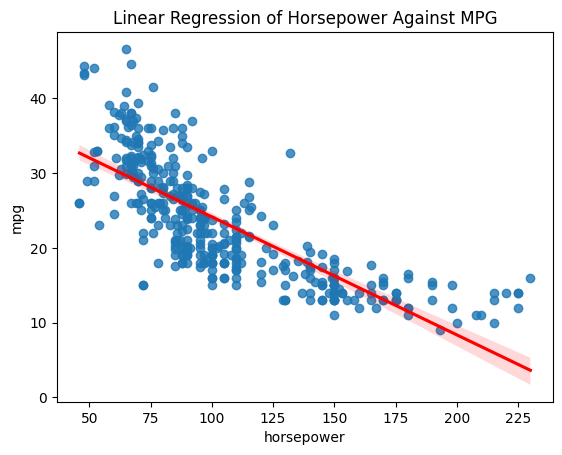

In [18]:
sns.regplot(x = "horsepower",
            y = "mpg", 
            data = auto, 
            line_kws= {"color":"red"},)
plt.title("Linear Regression of Horsepower Against MPG")

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

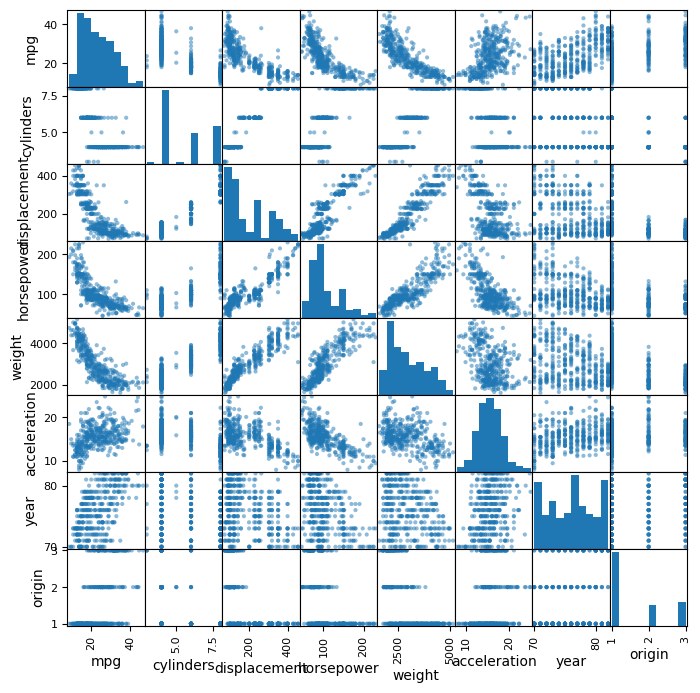

In [26]:
#Begin Multiple Linear Regression
pd.plotting.scatter_matrix(auto, figsize = (8,8))

In [ ]:
#Create Correlation matrix
auto = auto.drop(columns="name")


Text(0.5, 1.0, 'Correlation Heatmap')

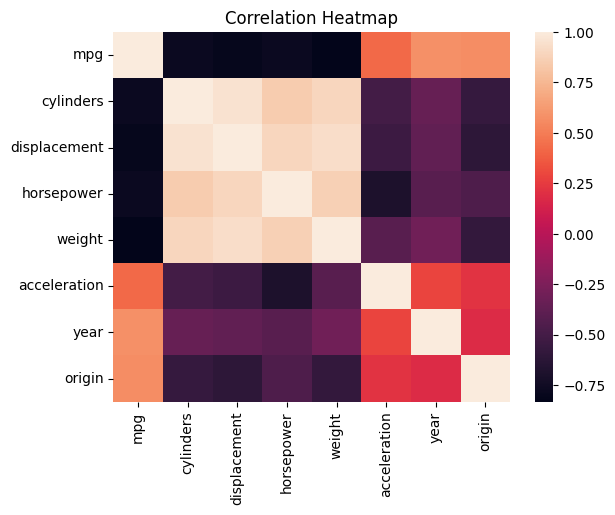

In [35]:
sns.heatmap(auto.corr())
plt.title("Correlation Heatmap")

In [38]:
y = auto["mpg"]
x = auto.drop(columns="mpg")
model = sm.OLS(y,x)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
cylinders,-0.7055,0.323,-2.181,0.030
displacement,0.0219,0.008,2.871,0.004
horsepower,-0.0396,0.013,-3.147,0.002
weight,-0.0060,0.001,-9.258,0.000
acceleration,-0.0796,0.090,-0.881,0.379
year,0.5836,0.024,24.150,0.000
origin,1.3100,0.281,4.663,0.000
